In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
X = data.drop(columns=['math score'], axis=1)
y = data['math score']

In [11]:
num = X.select_dtypes(exclude='object').columns
feat = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer([
    ("Standard Scaler", Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num),
    ("OneHot Encoder", Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
    ]), feat)
])

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    mse = mean_squared_error(true, predicted)
    return mae, r2, mse

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "Catboost": CatBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "Random Forest": RandomForestRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    model_train_mae, model_train_r2, _ = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_r2, _ = evaluate_model(y_test, y_test_pred)

    print(f"Model: {name}")

    print("Model performance for Training set")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")

    print("----------------------------------")

    print("Model performance for Test set")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")

    model_list.append(name)
    r2_list.append(model_test_r2)

    print("=" * 35, "\n")

Model: Linear Regression
Model performance for Training set
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804

Model: Lasso
Model performance for Training set
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254

Model: Ridge
Model performance for Training set
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805

Model: Decision Tree
Model performance for Training set
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Mean Absolute Error: 6.2900
- R2 Score: 0.7454

Model: Ada Boost
Model performance for Training set
- Mean Absolute Error: 4.7460
- R2 Score: 0.8518
---------------------------

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880450
0,Linear Regression,0.880433
7,Random Forest,0.853302
5,Catboost,0.850263
4,Ada Boost,0.850179
1,Lasso,0.825447
6,XGBoost,0.820924
3,Decision Tree,0.745416


Text(0, 0.5, 'Predicted')

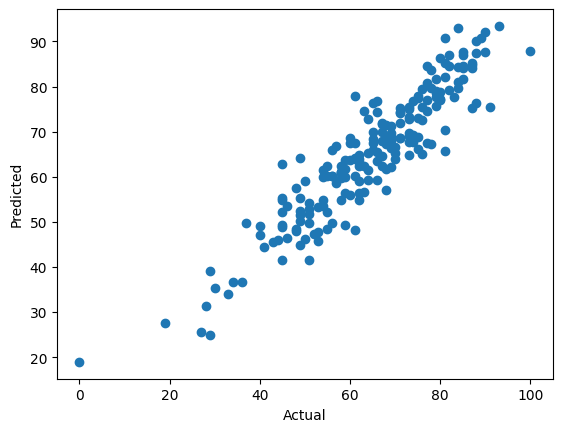

In [22]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

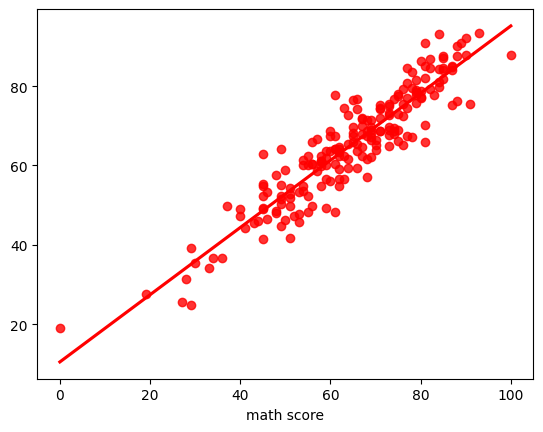

In [23]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,75.43,15.57
737,53,53.38,-0.38
740,80,76.98,3.02
660,74,76.78,-2.78
411,84,79.77,4.23
...,...,...,...
408,52,47.25,4.75
332,62,59.05,2.95
208,74,68.66,5.34
613,65,67.52,-2.52
